# Synthetic Data with SDV (default demo)

### Reference

- [Github Homepage SDV](https://github.com/sdv-dev/SDV)

In [40]:
from sdv import load_demo
from sdv import SDV
import pandas as pd
import matplotlib.pyplot as plt

# load example data

In [3]:
# load
metadata, tables = load_demo(metadata=True)

### data tables

In [4]:
# display tables
print('TABLES:')
print(f'type: {type(tables)}')
print(f'available tables: {tables.keys()}')
for stable in tables.keys():
    print(f'shape table "{stable}": {tables[stable].shape}')

TABLES:
type: <class 'dict'>
available tables: dict_keys(['users', 'sessions', 'transactions'])
shape table "users": (10, 4)
shape table "sessions": (10, 5)
shape table "transactions": (10, 5)


### metadata

A Metadata object with all the information that SDV needs to know about the dataset.
For more details about how to build the Metadata for your own dataset, please refer to the Working with [Metadata tutorial](https://sdv.dev/SDV/user_guides/relational/relational_metadata.html).

In [5]:
# display tables
print('METADATA:')
print(f'type: {type(metadata)}')
display(metadata)

METADATA:
type: <class 'sdv.metadata.dataset.Metadata'>


Metadata
  root_path: .
  tables: ['users', 'sessions', 'transactions']
  relationships:
    sessions.user_id -> users.user_id
    transactions.session_id -> sessions.session_id

# DATA SYNTHETIC MODEL

## training

In [6]:
# initialize
sdv = SDV()
# fit
sdv.fit(metadata, tables)

### save / load the trained model

## SAMPLE: same size with synthetic data

In [7]:
# get a sample
samples1 = sdv.sample()

In [8]:
# display tables
print('SAMPLES:')
print(f'type: {type(samples1)}')
print(f'available tables: {samples1.keys()}')
for stable in samples1.keys():
    print(f'shape table "{stable}": {samples1[stable].shape}')

SAMPLES:
type: <class 'dict'>
available tables: dict_keys(['users', 'sessions', 'transactions'])
shape table "users": (10, 4)
shape table "sessions": (10, 5)
shape table "transactions": (10, 5)


## SAMPLE: bigger size with synthetic data

In [9]:
# get a sample
samples2 = sdv.sample(num_rows = 1000)

In [10]:
# display tables
print('SAMPLES:')
print(f'type: {type(samples2)}')
print(f'available tables: {samples2.keys()}')
for stable in samples2.keys():
    print(f'shape table "{stable}": {samples2[stable].shape}')

SAMPLES:
type: <class 'dict'>
available tables: dict_keys(['users', 'sessions', 'transactions'])
shape table "users": (1000, 4)
shape table "sessions": (1000, 5)
shape table "transactions": (1000, 5)


# VALIDATION

In [18]:
# collect data
name = 'users'
dfu1 = tables[name]
dfu2 = samples1[name]
dfu3 = samples2[name]
cols = [c for c in dfu1.columns.tolist() if not 'id' in c]

In [36]:
c = 'country'
comp = pd.concat([dfu1[c].value_counts(normalize = True, dropna = False), dfu2[c].value_counts(normalize = True, dropna = False), dfu3[c].value_counts(normalize = True, dropna = False)], axis = 1)
comp.columns = ['original', 'synthetic', 'sythentic_bigger']
comp

,original,synthetic,sythentic_bigger
UK,0.3,0.1,0.234
ES,0.2,0.2,0.257
US,0.2,0.4,0.268
FR,0.1,0.1,0.101
BG,0.1,0.1,0.066
DE,0.1,0.1,0.074


In [37]:
c = 'gender'
comp = pd.concat([dfu1[c].value_counts(normalize = True, dropna = False), dfu2[c].value_counts(normalize = True, dropna = False), dfu3[c].value_counts(normalize = True, dropna = False)], axis = 1)
comp.columns = ['original', 'synthetic', 'sythentic_bigger']
comp

,original,synthetic,sythentic_bigger
F,0.4,0.4,0.329
M,0.3,0.3,0.441
NaN,0.3,0.3,0.230


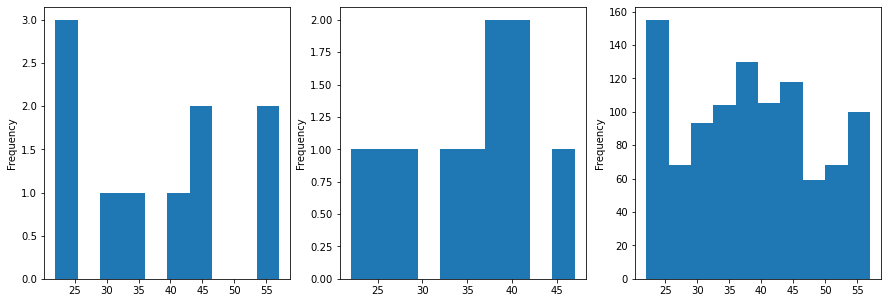

In [43]:
c = 'age'
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (15,5))
dfu1[c].plot(kind = 'hist', ax = ax1)
dfu2[c].plot(kind = 'hist', ax = ax2)
dfu3[c].plot(kind = 'hist', ax = ax3)
plt.show()